## Lab 8
### Running Spades
    Command: spades.py -1 /data/lab8/illumina_reads_R1.fastq -2 /data/lab8/illumina_reads_R2.fastq --pacbio /data/lab8/pacbio_reads.fastq -t 1 -o contigs.fasta -t 1
    
_Why do we expect short reads to produce a more fragmented assembly than long reads?_    
    Short reads produce more fragmented assemblies because because short reads result in more contigs than long reads and as a result there are likely to be be more gaps between the reads, creating more fragmented assemblies.   
    
_Why does a single-molecule sequencing like PacBio have a higher error rate than Illumina?_  
    Illumina uses smaller reads than PacBio does. As a result, Illumina can use multiple contigs for one read increasing the coverage for a read whereas PacBio doesn't do this due to having longer reads. Hence, Pacbio has a higher error error rate than Illumina.

## Lab 9
### Generating Assembly Statistics

_Why is N50 is useful statistic to calculate? Why not just list the mean or median contig length?In your assembly, are scaffolds longer than contigs, or are scaffolds approximately equal to contigs?_  

N50 is useful to calculate because the value of N50 is the value where 50% of the entire assembly is contained in contigs or scaffolds equal to or larger than this value. It is not the same as listing the mean or median contig length because the mean and median of contigs accounts for the contigs individually whereas N50 takes into account the total length and sums all the contigs up to 50% of the total length, and thus biases the statistic in favor of longer contigs. In our assembly, scaffolds are approximately equal to contigs, but generally they should be longer than contigs.

### Extra Credit:

(array([94.,  5.,  7., 31., 23.,  4.,  3.,  2.,  3.]),
 array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18]),
 <a list of 9 Patch objects>)

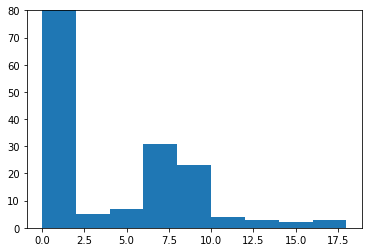

In [46]:
from matplotlib import pyplot as plt
import numpy as np

covArr = []
F = open("coverage.txt","r")
Node = F.read().split(">")
Node = Node[1:]
for v in Node:
    coverage = v.split("cov_")[1].split("\n")[0]
    covArr.append(float(coverage))

plt.ylim(0,80)
plt.hist(covArr, bins=np.arange(0,20,2))

avg  14.047804437500002
avgWithoutBig 5.350934748571429


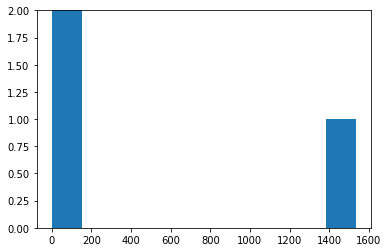

In [55]:
plt.ylim(0,2)
plt.hist(covArr)

avg = np.average(covArr)
avgWithoutBig = np.sort(covArr)[:-1]
avgWithoutBig = np.average(avgWithoutBig)
print("avg ", avg)
print("avgWithoutBig", avgWithoutBig)

_Is coverage uniformly distributed? Does it look Gaussian? Is it bimodalor trimodal?_  

The coverage is not uniformly distributed, and does not look Guassian because the distribution is skewed to the right, and there are significant gaps, as seen in the figure below, between different segments in the contigs file. The coverage follows a bimodal distribution, as can be seen by the modes of 0-2 and from around 6-10. 

_What explains the presence of contigs with coverage an integer multiple of the mean coverage?_  
The mean of the coverage distribution is 14, though there are contigs with coverages of 1536 and 150, values which are multiples of the mean coverage. This is likely because these contigs are covered many times by the reads from the sequencing machine, and these contigs thus have smaller lengths as they are covered so many times by the reads. 

### Identify the taxon from which your genome originated
We know that the genome originated from a taxonof bacteria. One component of bacterial ribosomes is the 16S ribosomal RNA subunit.This functional RNA is conserved throughout all bacteria, and is often used as a taxonomic marker gene.Much of the gene is highly conserved, as function ribosomes are required for protein synthesis, but some regions differ greater between bacterial taxa.These “hypervariable regions”can be used to determine the taxonfrom which a 16S rRNA gene originated.

#### Scan over the entire genome to locate copies of the 16S ribosomal RNA gene and extract the 16S rRNA genes from the assembly
* run the rna_hmm3.pyprogram on your assembled contigs to locate rRNA genes.  
* delete all lines within other than those containing 16S_rRNA genes.  
* use bedtools getfasta to extract nucleic acid sequences of the 16S rRNA genes from your assembly.

Command line: 
    
    cat contigs.GFF | grep "16S" > 16S_rRNA.GFF bedtools getfasta -fi contigs.fasta -bed 16S_rRNA.GFF > 16S_rRNA.fasta   
    (See output file 16S_rRNA.fasta)
    
    scp seqmatch_download.txt be131-02@bioe131.com:~/computational_biology_BioE131/lab8/assembled_output/.

#### Compare these genes to a database of known 16S rRNA genes.
Use Ribosomal Database Project’s SeqMatch tool to identify the 16S sequences by comparing them to a database of high-quality, curated sequences, obtained from known bacteria. 

#### Genus-level identification
genus: Pseudomonas  
    All of our 16S sequences matched with the genus Pseudomonas.

## Genome annotation: RAST summary

### Organism Overview for Pseudomonas aeruginosa (287.6682)

__Genome:__	Pseudomonas aeruginosa (Taxonomy ID: 287)  
__Domain:__	Bacteria   
__Taxonomy:__ Bacteria; Proteobacteria; Gammaproteobacteria; Pseudomonadales; Pseudomonadaceae; Pseudomonas; Pseudomonas aeruginosa group; Pseudomonas aeruginosa   
__Neighbors:__ View closest neighbors    
__Size:__ 6,678,635     
__GC Content:__	58.7  
__N50:__ 234690  
__L50:__ 11  
__Number of Contigs (with PEGs):__ 176  
__Number of Subsystems:__ 393  
__Number of Coding Sequences:__	6352  
__Number of RNAs:__	85  

### Features of Pseudomonas aeruginosa Table

In [64]:
import pandas as pd
table = pd.read_csv('table.tsv', sep = "	")
table

,Feature ID,Type,Contig,Start,Stop,Frame,Strand,Length (bp),Function,Subsystem,NCBI GI,locus
0,fig|287.6682.classifier_predicted_region.1,CLASSIFIER_PREDICTED_REGION,NODE_19_length_148556_cov_8.773953,41646,41660,3,+,15,Levofloxacin resistance predicted region,- none -,,
1,fig|287.6682.peg.1,CDS,NODE_100_length_456_cov_0.772036,153,1,-3,-,153,"ABC transporter, ATP-binding protein",- none -,,
2,fig|287.6682.peg.2,CDS,NODE_101_length_454_cov_0.929664,2,100,2,+,99,hypothetical protein,- none -,,
3,fig|287.6682.peg.3,CDS,NODE_103_length_453_cov_2.276074,452,3,-2,-,450,hypothetical protein,- none -,,
4,fig|287.6682.peg.4,CDS,NODE_104_length_453_cov_1.000000,453,241,-3,-,213,Two-component transcriptional response regulat...,- none -,,
5,fig|287.6682.peg.5,CDS,NODE_107_length_452_cov_1.000000,3,335,3,+,333,"Multidrug efflux system, inner membrane proton...",- none -,,
6,fig|287.6682.peg.6,CDS,NODE_108_length_452_cov_0.969231,451,257,-1,-,195,hypothetical protein,- none -,,
7,fig|287.6682.peg.7,CDS,NODE_10_length_235234_cov_7.139043,70,2,-1,-,69,Lipoate-protein ligase A,Lipoic acid metabolism,,
8,fig|287.6682.peg.8,CDS,NODE_10_length_235234_cov_7.139043,937,203,-1,-,735,"Glutamine amidotransferase, class I",- none -,,
9,fig|287.6682.peg.9,CDS,NODE_10_length_235234_cov_7.139043,3189,1045,-3,-,2145,Enoyl-CoA hydratase (EC 4.2.1.17) / 3-hydroxya...,Acetyl-CoA fermentation to Butyrate; <br>Acety...,,


### Subsystem Information

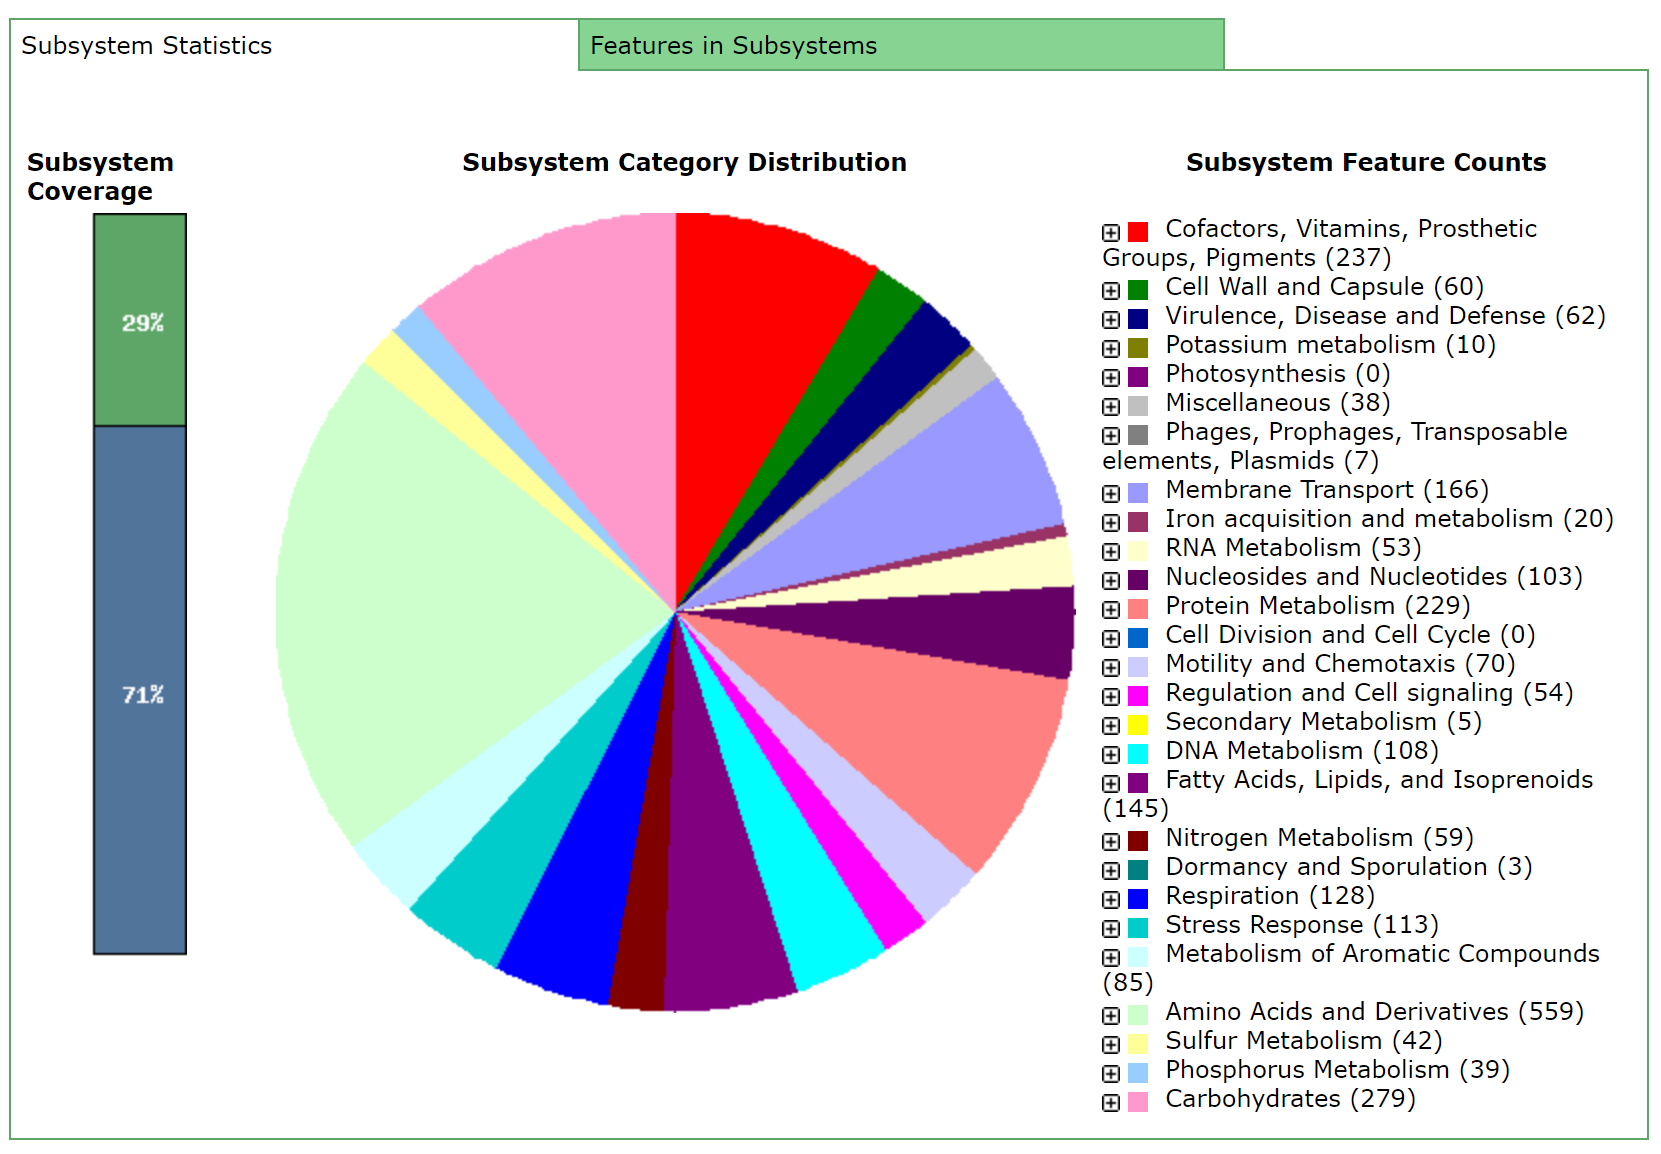

In [66]:
from IPython.display import Image, display
image = Image(filename = "subsystem_features.PNG")
image

### Genome Classification Information
This genome has been classified by 1 classifier:
#### Results from classifier Levofloxacin
__Classifier name:__ Levofloxacin  
__Antibiotics:__ Levofloxacin  
__Estimate of classifer accuracy:__	0.845  
__Area under ROC curve:__ 0.898  
__F1 score:__ 0.852  
__Sensitivity:__ sensitive  
__Matching features:__	  

    ID: classifier_predicted_region.1  
    Function: Levofloxacin resistance predicted region  
    Alpha: 1.15682  
    Round: 0  

## Genome Annotation: BASys summary

[Click here to see results from BASys](https://www.basys.ca/server2/basys/cache/4469a6eea4426db4364f8e10a258f7c6/index.html)

### BASys Annotation Summary
__Chromosome Id:__	Pseudomonas  
__Length:__	414008  
__Gram Stain:__	Negative  
__Topology:__	circular  
__Number of Genes Identified:__ 444  
__Number of Genes Annotated:__	444  

### Research and Write-Up
Now that you have identified your genome and sent off your genome forannotation, take some time to research whatis known about its genus and/or species. Search PubMed for recent publications and read through some abstracts. Once your RAST job has finished, you will be presented with a graphical interpretation of the pathways encoded by your genome, and information about its phylogenetic relatives.

1. What environment do relatives of your bacterium live in? Is there evidence of adaptation to this environment in the genome?  
2. Based on its genome, is your bacterium auxotrophic for any amino acids? Are its closest relatives also auxotrophic for these?  
3. Horizontal gene transfer is common among bacteria. Is there any evidence for HGT in your genome?   
4. CRISPR-Cas9 is so hot right now. Does your genome have a CRISPR system? Can you determine where the spacer sequences originated from?  
5. Does your genome encode any known bacteriocins,antibiotics, or toxins?  
6. Make an argument for why or why not your bacterium would be considered a human pathogen, using the genome and your research as evidence.  
7. Does your genome encode any known antibiotic resistance genes? Do you expect it to be susceptible to penicillin, tetracycline, or chloramphenicol?

Pseudomonas aeruginosa is the bacterium whose reads we have procured in this lab. The environment relatives of Pseudomonas generally inhabit soil, marshes, costal marine habitats, and also human and animal tissues. Pseudomonas can survive in a variety of ecological conditions, and thus have many phenotypes depending on its environmental condition. Pseudomonas aeruginosa, a specie of Pseudomonas, is a pathogen which often infects individuals afflicted with cystic fibrosis, cancer, and other forms of tissue damage (ie. burn damage). All Pseudomonas are opportunistic pathogens, meaning that if the environmental conditions are right, they will infect the host and secrete virulence factors, as pyocyanin, lectin PA-IL (encoded by lecA), and biosurfactant rhamnolipids (synthesized by the products of the rhlAB operon)<sup>2</sup>.

From looking at the genome of Pseudomonas aeruginosa, there are many core genes that are preserved by many relatives of the Pseudomonas genus. There is low variability and little evolution present on a genomic basis. In fact, over 95% of the core genome is preserved in different environmental isolates of P. aeruginosa. One theory for this genomic similarity between environmental relatives of P. aeruginosa is that all of these environmental isolates are derived from a subpopulation of Pseudomonas, and thus do not reflect the overall genetic makeup of the genus Pseudomonas. Because P. aeruginosa lack sugar transporters, they rely more on their aerobic, oxidative metabolistic pathways instead of glycolysis, genetic variation and mutations are more easily caught by the regulatory functions of the bacteria<sup>1</sup>. However, despite the genotypical similarities among many isolates of P. aeruginosa, there are many phenotypical differences based on the environment it presides.

Horizontal gene transfer is common in many bacteria as a method of survival through DNA recombination and modification, and despite the lack of genetic variability in P. aeruginosa, P. aeruginosa utilize horizontal gene transfer regularly amongst its own species. With around 6.3 (6,264,403 bp) million base pairs, and a GC content of around 58.8%, P. aeruginosa has a complex genome compared to its prokaryotic counterparts. The low GC content also indicates that P. aeruginosa commonly perform horizontal gene transfer. This can account for both the phenotypical variability and the lack of genotypical variance present in many of these environmental isolates.

Looking at our P. aeruginosa genome, we see that it encodes the toxin Doc antibiotics which hosts the C-terminal domain of its antitoxin partner Phd through fold complementation, in a subsystem called the Phd-Doc, YdcE-YdcD toxin-antitoxin (programmed cell death) system. We also see the subsystem Chorismate which synthesizes Tryptophan, PAPA antibiotics, PABA, 3-hydroxyanthranilate, etc. We expect P. aeruginosa to be susceptible to penicillin, tetracycline, or chloramphenicol since it does not contain resistance to these antibiotics.

Finally, P. aeruginosa is a very common human and animal pathogen, and a P. aeruginosa infection can be anti-biotic resistant and secrete toxins lethal to its host. Due to the surface membrane proteins on P. aeruginosa (which additionally is Gram-negative and thus possess thinner cell walls), many antibiotics are effluxed or flow out before the antibiotics can inhibit any core cell functions. Furthermore, P. aeruginosa secrete alkaline proteases (encoded as arpA), and can do so directly into the cytoplasm of its host cells.



Citations:
1. Stover, C., Pham, X., Erwin, A., Mizoguchi, S., Warrener, P., Hickey, M., Brinkman, F., Hufnagle, W., Kowalik, D., Lagrou, M., Garber, R., Goltry, L., Tolentino, E., Westbrock-Wadman, S., Yuan, Y., Brody, L., Coulter, S., Folger, K., Kas, A., Larbig, K., Lim, R., Smith, K., Spencer, D., Wong, G., Wu, Z., Paulsen, I., Reizer, J., Saier, M., Hancock, R., Lory, S. and Olson, M. (2000). Complete genome sequence of Pseudomonas aeruginosa PAO1, an opportunistic pathogen. Nature, 406(6799), pp.959-964.  

2. Grosso-Becerra, M., Santos-Medellín, C., González-Valdez, A., Méndez, J., Delgado, G., Morales-Espinosa, R., Servín-González, L., Alcaraz, L. and Soberón-Chávez, G. (2014). Pseudomonas aeruginosa clinical and environmental isolates constitute a single population with high phenotypic diversity. BMC Genomics, 15(1), p.318.